<a href="https://colab.research.google.com/github/TendaiTerrence/Group_15_AI_FINALPROJECT/blob/main/eMOTIONDETECTOR_FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Realtime Face Emotion Recognition Model**

In [ ]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

Mounting the Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Reading and checking image shape

In [ ]:
img_arr = cv2.imread('/content/drive/MyDrive/ML/Final_Project/train/happy/Training_49139625.jpg')
img_arr.shape #rgb

(48, 48, 3)

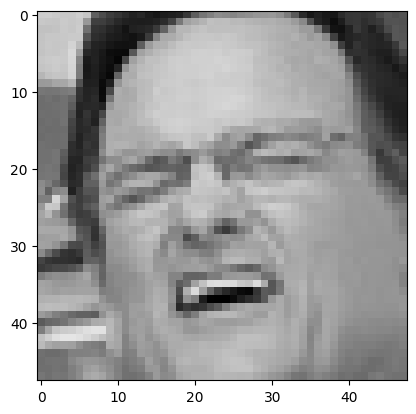

In [ ]:
plt.imshow(img_arr)

Loading training and testing data directories

In [ ]:
training_data_directory = '/content/drive/MyDrive/ML/Final_Project/train'
testing_data_directory = '/content/drive/MyDrive/ML/Final_Project/test'

In [ ]:
classes = ['angry', 'disgust','fear','happy','neutral','sad','surprise']

Showing 2 images per each class in all 7 classes of emotions

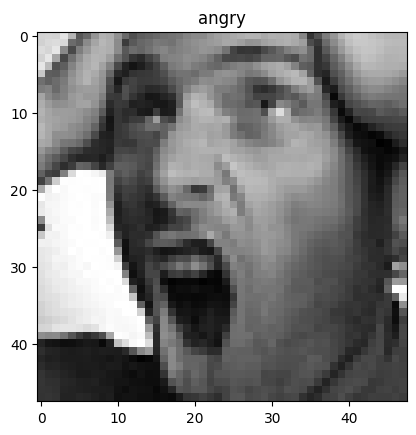

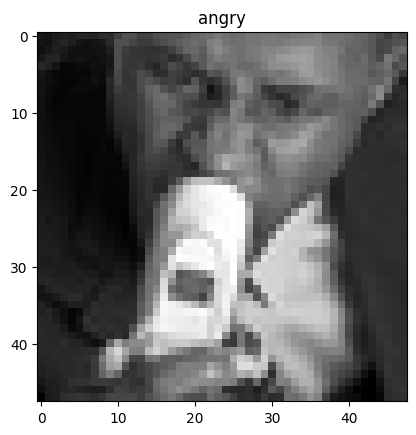

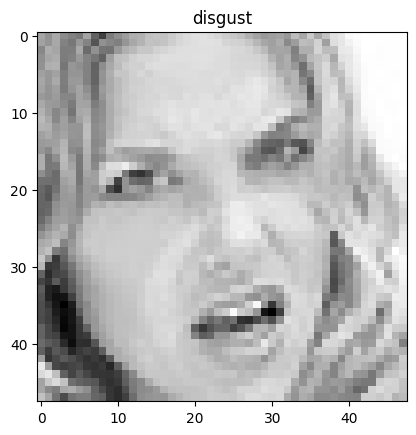

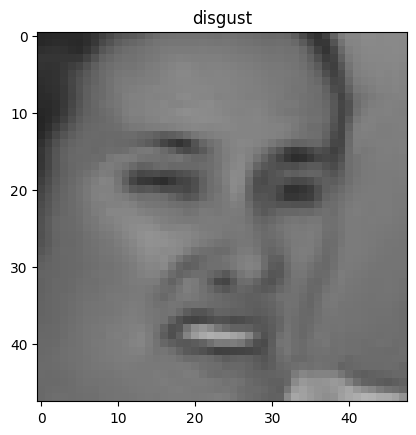

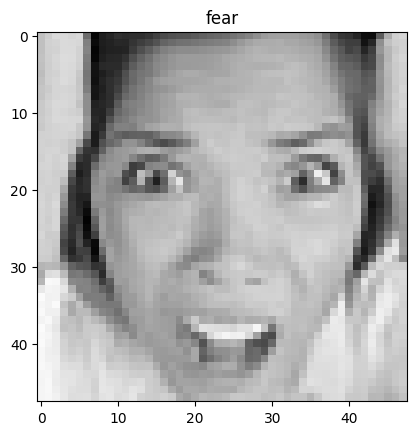

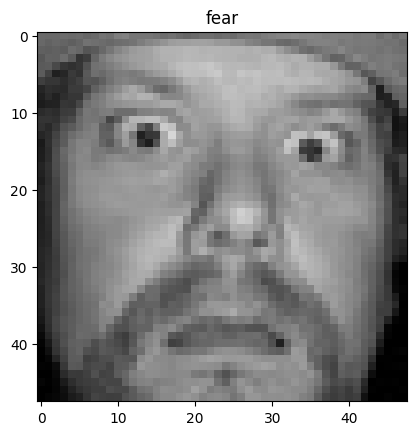

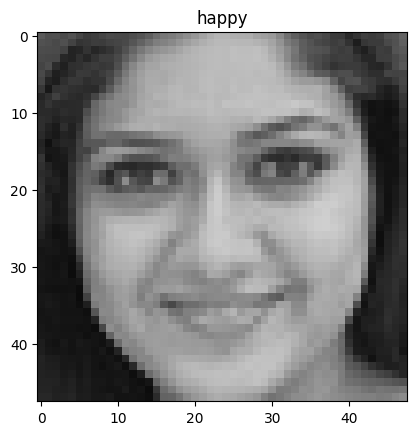

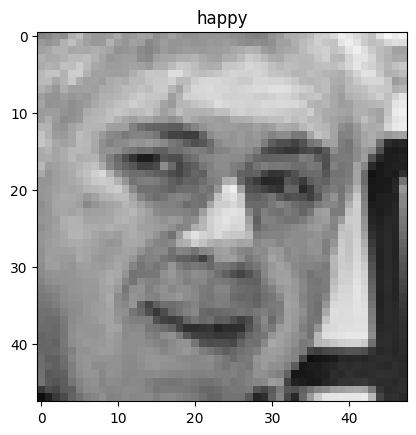

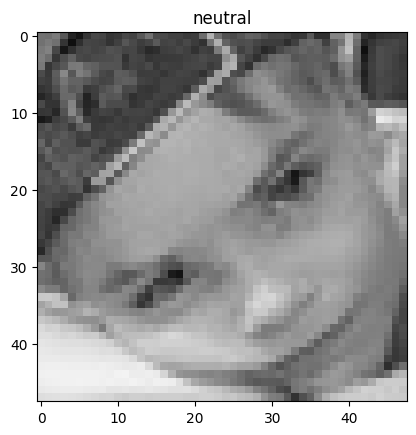

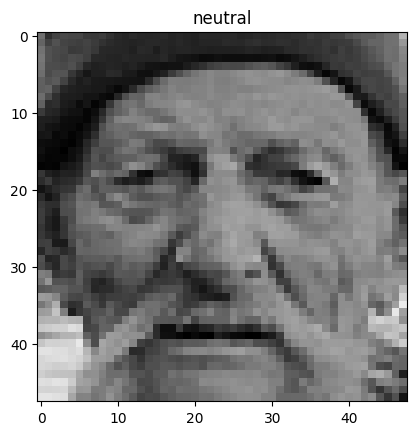

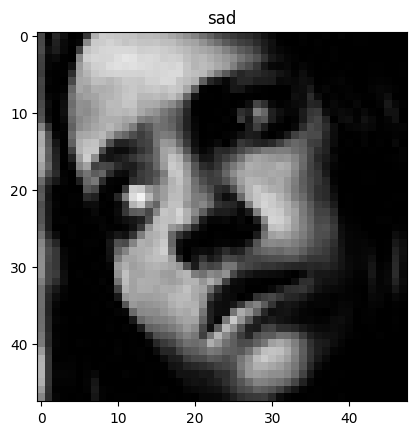

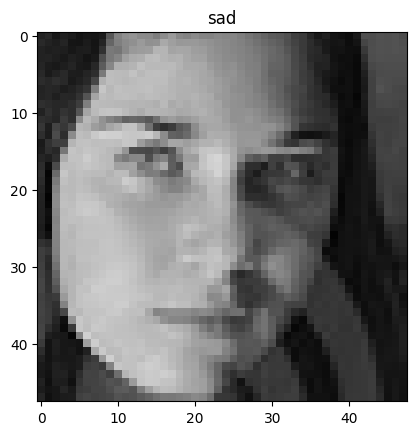

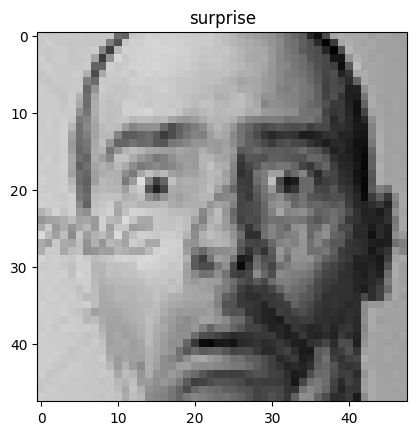

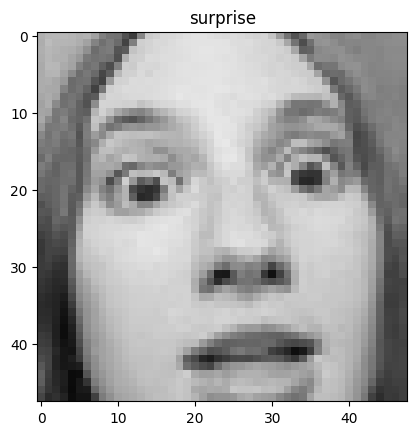

In [ ]:
for cat in classes:
    path = os.path.join(training_data_directory, cat)
    for img in os.listdir(path)[:2]:  # Display the first 2 images
        img_arr = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB))
        plt.title(cat)
        plt.show()

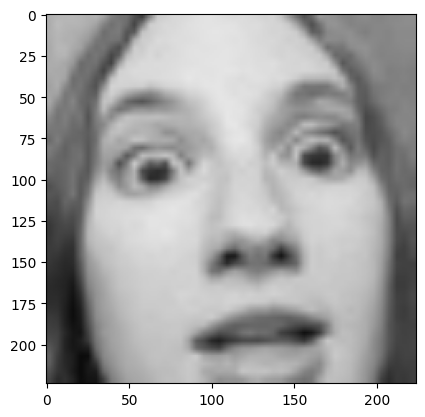

In [ ]:
## Changing the size of the image
img_size = 224  ##ImageNet => 224 x 224
new_arr = cv2.resize(img_arr,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_arr,cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
new_arr.shape

(224, 224, 3)

Ploting the total number of images per each class to check if our data is balanced or imbalanced

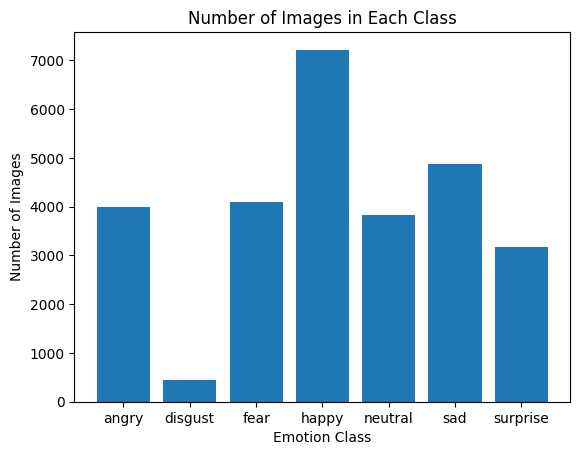

In [ ]:
# Function to plot histograms showing the total number of images in each folder
def plot_histogram(data_directory):
    class_counts = []
    for cat in classes:
        path = os.path.join(data_directory, cat)
        count = len(os.listdir(path))
        class_counts.append(count)

    plt.bar(classes, class_counts)
    plt.title('Number of Images in Each Class')
    plt.xlabel('Emotion Class')
    plt.ylabel('Number of Images')
    plt.show()

# Plot the original distribution
plot_histogram(training_data_directory)

- Our dataset exhibits a significant class imbalance, with the "happy" class having nearly twice as many images as any other class.
- To address this imbalance and foster a more equitable learning environment for our model, we have opted leveraging class weights.
- By incorporating class weights, our goal is to train a model that is not only adept at recognizing emotions but is also fair and unbiased across all emotion classes.
- This approach allows us to harness the valuable information present in all classes, even those with limited representation, contributing to a more robust and inclusive model.

Reading all the images and converting them to array

In [ ]:
training_data = [] ## data list

def create_training_data():
  for cat in classes:
    path = os.path.join(training_data_directory,cat)
    class_num = classes.index(cat) ##label
    for img in os.listdir(path):
      try:
        img_arr = cv2.imread(os.path.join(path,img))
        new_arr = cv2.resize(img_arr,(img_size,img_size))
        training_data.append([new_arr,class_num])
      except Exception as e:
        pass

create_training_data()

In [ ]:
len(training_data)

27628

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
testing_data = [] ## data list

def create_testing_data():
  for cat in classes:
    path = os.path.join(testing_data_directory,cat)
    class_num = classes.index(cat) ##label
    for img in os.listdir(path):
      try:
        img_arr = cv2.imread(os.path.join(path,img))
        new_arr = cv2.resize(img_arr,(img_size,img_size))
        testing_data.append([new_arr,class_num])
      except Exception as e:
        pass

create_testing_data()

In [ ]:
import random

random.shuffle(training_data)
# random.shuffle(testing_data)

In [ ]:
X = []   ##features
y = []    ## label

for feat, label in training_data:
  X.append(feat)
  y.append(label)

In [ ]:
X = np.array(X).reshape(-1, img_size, img_size, 3) # converting it to 4D

In [ ]:
## Normalizing the data
batch_size = 1000  # Batch size for training
for i in range(0, len(X), batch_size):
    X[i:i+batch_size] = X[i:i+batch_size] / 255.0

In [ ]:
Y = np.array(y)

In [ ]:
# Splitting the data into training, validating and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
XN_test = []
YN_test = []

for feat, label in testing_data:
  XN_test.append(feat)
  YN_test.append(label)

XN_test = np.array(XN_test).reshape(-1, img_size, img_size, 3) # converting it to 4D

In [ ]:
X_train.shape

(19891, 224, 224, 3)

In [ ]:
# ## Normalizing the testing data
batch_size = 1000  # Batch size for training
for i in range(0, len(XN_test), batch_size):
    XN_test[i:i+batch_size] = XN_test[i:i+batch_size] / 255.0

In [ ]:
YN_test = np.array(YN_test)

In [ ]:
YN_test.shape

(7178,)

## Model training

In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.models import Model

# Input layer
input_layer = Input(shape=(224, 224, 3))

# Convolutional layers
conv1 = Conv2D(128, kernel_size=(3,3), activation='relu')(input_layer)
pool1 = MaxPooling2D(pool_size=(2,2))(conv1)
drop1 = Dropout(0.4)(pool1)

conv2 = Conv2D(256, kernel_size=(3,3), activation='relu')(drop1)
pool2 = MaxPooling2D(pool_size=(2,2))(conv2)
drop2 = Dropout(0.4)(pool2)

conv3 = Conv2D(512, kernel_size=(3,3), activation='relu')(drop2)
pool3 = MaxPooling2D(pool_size=(2,2))(conv3)
drop3 = Dropout(0.4)(pool3)

conv4 = Conv2D(512, kernel_size=(3,3), activation='relu')(drop3)
pool4 = MaxPooling2D(pool_size=(2,2))(conv4)
drop4 = Dropout(0.4)(pool4)


In [ ]:
# Flatten layer
flatten = Flatten()(drop4)

# Fully connected layers
dense1 = Dense(512, activation='relu')(flatten)
drop5 = Dropout(0.4)(dense1)

dense2 = Dense(256, activation='relu')(drop5)
drop6 = Dropout(0.3)(dense2)

# Output layer
output_layer = Dense(7, activation='softmax')(drop6)

# Create the model
model_k = Model(inputs=input_layer, outputs=output_layer)

In [ ]:

# Compile the model (add optimizer, loss, and metrics as needed)
model_k.compile(loss='sparse_categorical_crossentropy',optimizer = optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

# Print the summary of the model
model_k.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 128)     0         
 D)                                                              
                                                                 
 dropout_3 (Dropout)         (None, 111, 111, 128)     0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 256)     295168    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 256)       0         
 g2D)                                                      

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Calculating class weights
class_weights = compute_class_weight('balanced',classes = np.unique(y_train), y = y_train)
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict

In [ ]:
history = model_k.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
502/622 [=======================>......] - ETA: 45s - loss: 1.8224 - accuracy: 0.2563

KeyboardInterrupt: ignored

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

# Define the model-building function for Keras Tuner
def build_model(hp):
    model = keras.Sequential()

    model.add(layers.Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(256, kernel_size=(3,3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(512, kernel_size=(3,3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Conv2D(512, kernel_size=(3,3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Flatten())

    model.add(layers.Dense(hp.Int('dense_1_units', min_value=128, max_value=1024, step=32), activation='relu'))
    model.add(layers.Dropout(hp.Float('dropout_1', min_value=0.3, max_value=0.5, step=0.05)))

    model.add(layers.Dense(hp.Int('dense_2_units', min_value=64, max_value=512, step=32), activation='relu'))
    model.add(layers.Dropout(hp.Float('dropout_2', min_value=0.2, max_value=0.4, step=0.05)))

    model.add(layers.Dense(7, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',optimizer = optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

    return model


In [ ]:
# Instantiate the Keras Tuner RandomSearch tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # You can increase this number for a more comprehensive search
    directory='my_tuner_dir',
    project_name='emotion_detection_tuner'
)

# Performing the hyperparameter search using Keras Tuner
tuner.search(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Getting the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Building the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the model with the best hyperparameters
best_model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val))

In [ ]:
# testing the trained model on the test dataset
from sklearn.metrics import accuracy_score

predictions = best_model.predict(XN_test)
predictions = np.argmax(predictions, axis=1)
print('Accuracy on test set:', accuracy_score(YN_test, predictions))

## **Deep Learning Model Training - Transfer Learning**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import models
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from glob import glob

In [ ]:
model = tf.keras.applications.MobileNetV2()  ## Pre-trained model

14536120/14536120 [==============================] - 2s 0us/step


In [ ]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [ ]:
for layer in model.layers:
  layer.trainable = False

In [ ]:
base_input = model.layers[0].input
base_output = model.layers[-2].output

In [ ]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [ ]:
base_input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>

In [ ]:
input_layer = layers.Dense(128, activation='relu')(base_output)
# Adding Dropout layers for regularization
dropout1 = layers.Dropout(0.5)(input_layer)
dense1 = layers.Dense(128, activation='relu')(dropout1)

dropout2 = layers.Dropout(0.25)(dense1)
dense2 = layers.Dense(64, activation='relu')(dropout2)

dropout3 = layers.Dropout(0.25)(dense2)
dense3 = layers.Dense(32, activation='relu')(dropout3)

output_layer = layers.Dense(7, activation='softmax')(dense3)  # Output layer, my classes are 7 ['angry', 'disgust','fear','happy','neutral','sad','surprise'] /Classification layer

fine_model = keras.Model(inputs=base_input, outputs=output_layer)

In [ ]:
output_layer #output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_4')>

In [ ]:
fine_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [ ]:
fine_model.compile(loss='sparse_categorical_crossentropy',optimizer = optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler

# Learning rate scheduler function
def lr_scheduler(epoch, lr):
    if epoch % 10 == 0 and epoch != 0:
        return lr * 0.1
    return lr

# Compile the model with a learning rate scheduler
fine_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

# Set up the learning rate scheduler callback
lr_callback = LearningRateScheduler(lr_scheduler)

In [ ]:
y_train

array([5, 5, 6, ..., 5, 2, 6])

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

# Calculating class weights
class_weights = compute_class_weight('balanced',classes = np.unique(y_train), y = y_train)
class_weight_dict = dict(enumerate(class_weights))
class_weight_dict

{0: 0.9798522167487684,
 1: 9.286181139122316,
 2: 0.9596661359579293,
 3: 0.5469819881754434,
 4: 1.0280649162704156,
 5: 0.81002606287669,
 6: 1.2590037344135705}

In [ ]:
# Training the model with the learning rate scheduler callback and class weights
history = fine_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[lr_callback],
    class_weight=class_weight_dict,
    shuffle=True,
    verbose=1,
)


Epoch 1/50
622/622 [==============================] - 41s 48ms/step - loss: 1.9594 - accuracy: 0.1627 - val_loss: 1.9380 - val_accuracy: 0.1565 - lr: 1.0000e-04
Epoch 2/50
622/622 [==============================] - 28s 45ms/step - loss: 1.9409 - accuracy: 0.1554 - val_loss: 1.9302 - val_accuracy: 0.2031 - lr: 1.0000e-04
Epoch 3/50
622/622 [==============================] - 28s 45ms/step - loss: 1.9386 - accuracy: 0.1604 - val_loss: 1.9418 - val_accuracy: 0.0556 - lr: 1.0000e-04
Epoch 4/50
622/622 [==============================] - 28s 45ms/step - loss: 1.9337 - accuracy: 0.1743 - val_loss: 1.9296 - val_accuracy: 0.2026 - lr: 1.0000e-04
Epoch 5/50
622/622 [==============================] - 28s 45ms/step - loss: 1.9346 - accuracy: 0.1792 - val_loss: 1.9284 - val_accuracy: 0.1995 - lr: 1.0000e-04
Epoch 6/50
622/622 [==============================] - 28s 45ms/step - loss: 1.9334 - accuracy: 0.1801 - val_loss: 1.9293 - val_accuracy: 0.2035 - lr: 1.0000e-04
Epoch 7/50
622/622 [==============

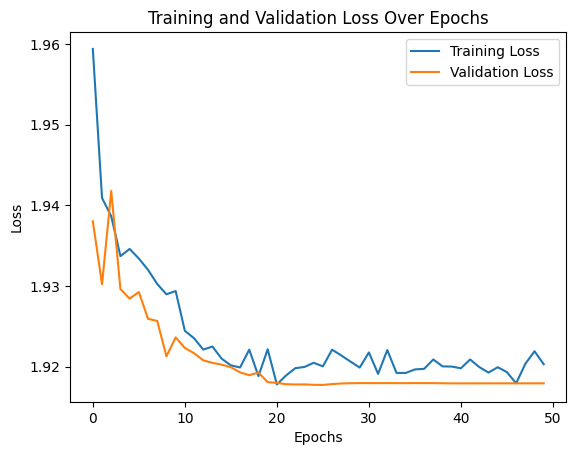

In [ ]:
# label_mapping = {
#     0: 'happy',
#     1: 'surprise',
#     2: 'angry',
#     3: 'sad',
#     4: 'fear',
#     5: 'disgust',
#     6: 'neutral'
# }
# Plotting training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# y_ticks = np.arange(0.3, 1.0, 0.05)
# plt.yticks(y_ticks)
plt.legend()
plt.show()

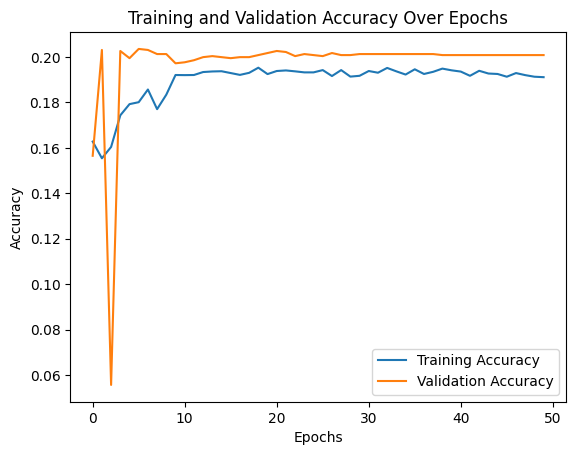

In [ ]:
# Plotting training accuracy and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# testing the trained model on the test dataset
from sklearn.metrics import accuracy_score

predictions = fine_model.predict(XN_test)
predictions = np.argmax(predictions, axis=1)
print('Accuracy on test set:', accuracy_score(YN_test, predictions))

225/225 [==============================] - 8s 38ms/step
Accuracy on test set: 0.19643354694901086


In [ ]:
vgg = VGG16(input_shape=[224,224] + [3], weights='imagenet', include_top=False)

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(len(classes), activation='softmax')(x)
vgg6_fine_tuned_model = Model(inputs=vgg.input, outputs=prediction)
vgg6_fine_tuned_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
from keras import optimizers
from keras.losses import categorical_crossentropy
from keras.metrics import categorical_accuracy

adam = optimizers.Adam()
vgg6_fine_tuned_model.compile(loss=categorical_crossentropy,
              optimizer=adam,
              metrics=[categorical_accuracy])


In [ ]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [ ]:

train_set = train_datagen.flow_from_directory(training_data_directory,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 27628 images belonging to 7 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(testing_data_directory,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 7178 images belonging to 7 classes.


In [ ]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(filepath='vgg6_fine_tuned_model.h5',
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

model_history=vgg6_fine_tuned_model.fit(
  train_set,
  validation_data=test_set,
  epochs=30)

Epoch 1/30
864/864 [==============================] - 395s 451ms/step - loss: 13.9280 - categorical_accuracy: 0.2878 - val_loss: 15.4248 - val_categorical_accuracy: 0.3147
Epoch 2/30
864/864 [==============================] - 392s 454ms/step - loss: 16.0918 - categorical_accuracy: 0.3205 - val_loss: 17.2211 - val_categorical_accuracy: 0.3239
Epoch 3/30
864/864 [==============================] - 393s 454ms/step - loss: 17.1574 - categorical_accuracy: 0.3273 - val_loss: 18.1394 - val_categorical_accuracy: 0.3199
Epoch 4/30
864/864 [==============================] - 394s 455ms/step - loss: 18.0066 - categorical_accuracy: 0.3292 - val_loss: 17.9161 - val_categorical_accuracy: 0.3183
Epoch 5/30
864/864 [==============================] - 396s 459ms/step - loss: 18.5266 - categorical_accuracy: 0.3306 - val_loss: 18.7807 - val_categorical_accuracy: 0.3236
Epoch 6/30
864/864 [==============================] - 393s 455ms/step - loss: 19.0569 - categorical_accuracy: 0.3322 - val_loss: 21.4517 - v

KeyboardInterrupt: ignored

In [ ]:
# Plot training & validation loss values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:

from tensorflow import keras

fine_model.save("fine_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
